#**EDA**

## Load

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import warnings
#import missingno as msno
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
pd.__version__

'1.3.5'

In [ ]:
np.__version__

'1.21.6'

In [ ]:
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Projects/bikesharing/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Projects/bikesharing/test.csv')
submit = pd.read_csv('/content/drive/MyDrive/Projects/bikesharing/sampleSubmission.csv')

## Summary

In [ ]:
print("train shape:", train.shape)
print("test shape:", test.shape)
print("submit shape:", submit.shape)

train shape: (10886, 12)
test shape: (6493, 9)
submit shape: (6493, 2)


In [ ]:
train.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [ ]:
test.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000


In [ ]:
submit.head(3)

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [ ]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
test.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
count,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000
mean,2.493300,0.029108,0.685815,1.436778,20.620607,24.012865,64.125212,12.631157
std,1.091258,0.168123,0.464226,0.648390,8.059583,8.782741,19.293391,8.250151
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,16.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,49.000000,7.001500
50%,3.000000,0.000000,1.000000,1.000000,21.320000,25.000000,65.000000,11.001400
75%,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,81.000000,16.997900
max,4.000000,1.000000,1.000000,4.000000,40.180000,50.000000,100.000000,55.998600


## Missing Values

In [ ]:
#msno.matrix(train, figsize=(12,5))

In [ ]:
#查看有無重複資料
nodup_train=train.drop_duplicates(subset=None, keep='first', inplace=False)

if nodup_train.shape[0]==train.shape[0]:
 print("no duplicates")


no duplicates


In [ ]:
#哪些columns存在缺失值
print(train.isnull().any())

datetime      False
season        False
holiday       False
workingday    False
weather       False
temp          False
atemp         False
humidity      False
windspeed     False
casual        False
registered    False
count         False
dtype: bool


## Feature Engineering

In [ ]:
train['date'] = train.datetime.apply(lambda x : x.split(' ')[0]) #split要有空格
train['year'] = train.datetime.apply(lambda x : x.split(' ')[0].split('-')[0])
train['month'] = train.date.apply(lambda datestring : calendar.month_name[datetime.strptime(datestring, '%Y-%m-%d').month])
train['hour'] = train.datetime.apply(lambda x : x.split(' ')[1].split(':')[0])
train['weekday'] = train.date.apply(lambda datestring : calendar.day_name[datetime.strptime(datestring,'%Y-%m-%d').weekday()])
train['season'] = train.season.map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})
#train['weather'] = train.weather.map({1:'Clear + Few clouds + Partly cloudy + Partly cloudy',\
#                                     2:'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',\
#                                     3:'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',\
#                                     4:'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'})

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  object 
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
 12  date        10886 non-null  object 
 13  year        10886 non-null  object 
 14  month       10886 non-null  object 
 15  hour        10886 non-null  object 
 16  weekday     10886 non-null  object 
dtypes: float64(3), int64(7), object(7)
memory usage: 1.4+ MB


## Outliers Analysis

In [ ]:
train.describe()
#windspeed&count欄位異常可能有離群值 且風速不為零--->需重新預測補植

,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
train_outlier = train[np.abs(train['count']-train['count'].mean()) > (3*train['count'].std())]
train_outlier

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,hour,weekday
6658,2012-03-14 17:00:00,Spring,0,1,1,28.70,31.820,28,6.0032,140,642,782,2012-03-14,2012,March,17,Wednesday
6659,2012-03-14 18:00:00,Spring,0,1,1,28.70,31.820,32,0.0000,102,647,749,2012-03-14,2012,March,18,Wednesday
6683,2012-03-15 18:00:00,Spring,0,1,1,27.06,31.060,44,19.0012,98,648,746,2012-03-15,2012,March,18,Thursday
6779,2012-03-19 18:00:00,Spring,0,1,1,26.24,31.060,57,16.9979,120,681,801,2012-03-19,2012,March,18,Monday
6849,2012-04-03 17:00:00,Summer,0,1,1,25.42,30.305,17,12.9980,123,634,757,2012-04-03,2012,April,17,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9935,2012-10-18 08:00:00,Winter,0,1,1,18.86,22.725,82,16.9979,31,803,834,2012-10-18,2012,October,08,Thursday
9944,2012-10-18 17:00:00,Winter,0,1,2,23.78,27.275,64,22.0028,102,788,890,2012-10-18,2012,October,17,Thursday
9945,2012-10-18 18:00:00,Winter,0,1,2,22.96,26.515,64,22.0028,68,720,788,2012-10-18,2012,October,18,Thursday
10519,2012-12-04 17:00:00,Winter,0,1,1,21.32,25.000,59,15.0013,43,700,743,2012-12-04,2012,December,17,Tuesday


In [ ]:
#離群值為異常高的租借量 查看分布多於:工作日/尖峰/好天氣
print(train['count'].mean())
print(train_outlier['count'].mean())

191.57413191254824
817.6734693877551


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


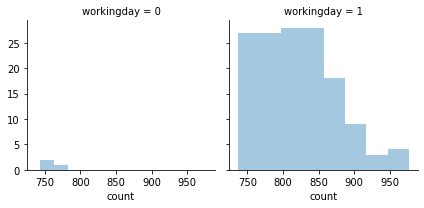

In [ ]:
g = sns.FacetGrid(train_outlier, col = 'workingday')
g.map(sns.distplot, 'count', kde=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


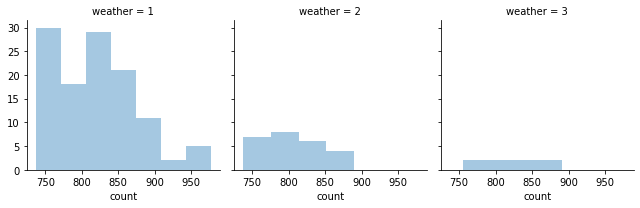

In [ ]:
g = sns.FacetGrid(train_outlier, col = 'weather')
g.map(sns.distplot, 'count', kde=False)

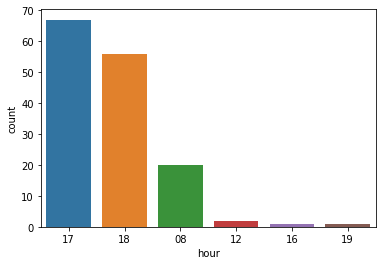

In [ ]:
sns.countplot(x = train_outlier['hour'])

In [ ]:
#用三倍標準差的標準去離群值
#print("Shape of the before outlier:", train.shape)
#train = train[np.abs(train['count']-train['count'].mean()) <= (3*train['count'].std())]
#print("Shape of the after outlier:", train.shape)

## Visualizing

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Weather'),
 Text(0.5, 1.0, 'Box Plot on Count Across Weather')]

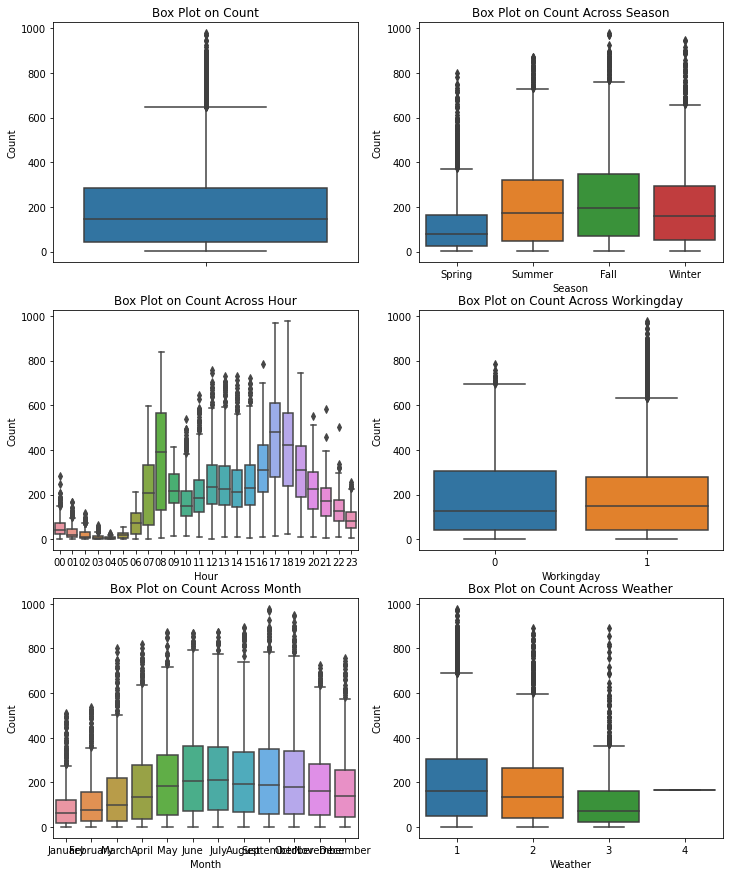

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_size_inches(12,15)
sns.boxplot(data=train, y='count', orient='v', ax=axes[0][0])
sns.boxplot(data=train, x='season', y='count', orient='v', ax=axes[0][1])
sns.boxplot(data=train, x='hour', y='count', orient='v', ax=axes[1][0])
sns.boxplot(data=train, x='workingday', y='count', orient='v', ax=axes[1][1])
sns.boxplot(data=train, x='month', y='count', orient='v', ax=axes[2][0])
sns.boxplot(data=train, x='weather', y='count', orient='v', ax=axes[2][1])

axes[0][0].set(ylabel='Count', title='Box Plot on Count')
axes[0][1].set(xlabel='Season', ylabel='Count', title='Box Plot on Count Across Season')
axes[1][0].set(xlabel='Hour', ylabel='Count', title='Box Plot on Count Across Hour')
axes[1][1].set(xlabel='Workingday', ylabel='Count', title='Box Plot on Count Across Workingday')
axes[2][0].set(xlabel='Month', ylabel='Count', title='Box Plot on Count Across Month')
axes[2][1].set(xlabel='Weather', ylabel='Count', title='Box Plot on Count Across Weather')

#spring got relatively low count
#7-8/17-18hour rush time,it can be attributed to office users and students
#most outlier from workingday
#sunny, no rain, relatively high count

      hour    variable  value
0       00      casual      3
1       01      casual      8
2       02      casual      5
3       03      casual      3
4       04      casual      0
...    ...         ...    ...
21767   19  registered    329
21768   20  registered    231
21769   21  registered    164
21770   22  registered    117
21771   23  registered     84

[21772 rows x 3 columns]
   hour    variable       value
0    00      casual   10.312088
1    00  registered   44.826374
2    01      casual    6.513216
3    01  registered   27.345815
4    02      casual    4.819196
5    02  registered   18.080357
6    03      casual    2.681293
7    03  registered    9.076212
8    04      casual    1.262443
9    04  registered    5.144796
10   05      casual    1.455752
11   05  registered   18.311947
12   06      casual    4.149451
13   06  registered   72.109890
14   07      casual   10.914286
15   07  registered  202.202198
16   08      casual   21.542857
17   08  registered  341.226374
18   0

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Hour'),
 Text(0.5, 1.0, 'Average count by hour across user type')]

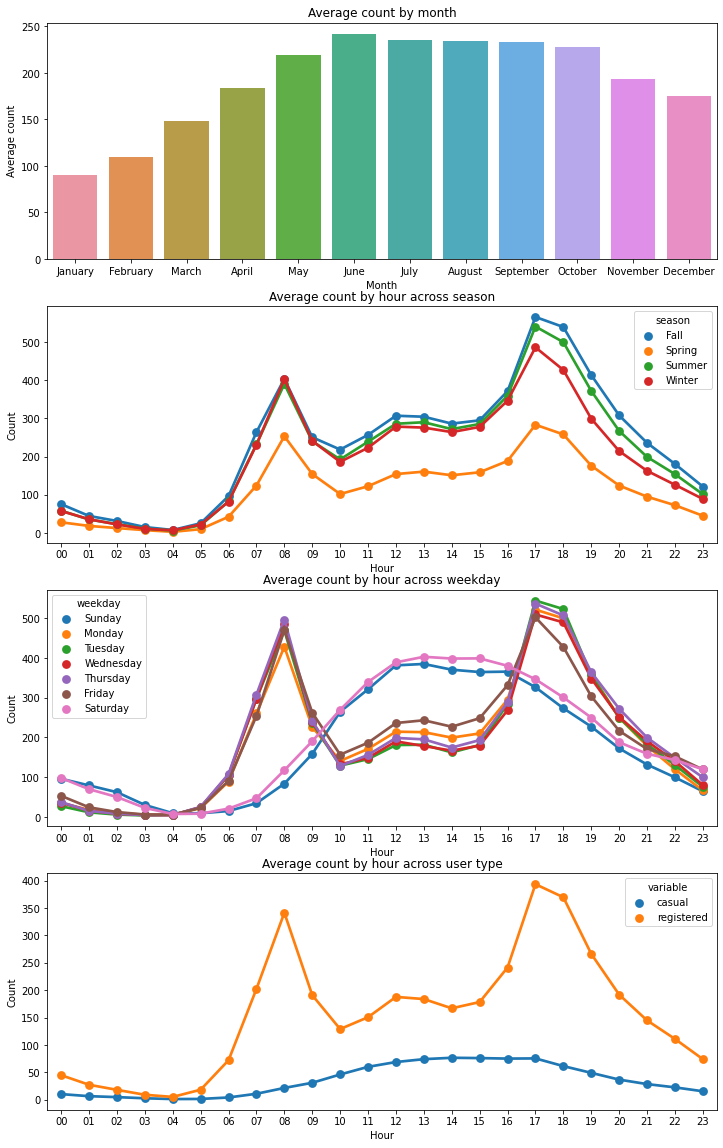

In [ ]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(nrows=4)
fig.set_size_inches(12,20)

monthOrder = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
weekOrder = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

monthAgg = pd.DataFrame(train.groupby('month')['count'].mean()).reset_index()
monthSort = monthAgg.sort_values(by='count', ascending=False)
sns.barplot(data=monthSort, x='month', y='count', ax=ax1, order=monthOrder)
ax1.set(xlabel='Month', ylabel='Average count', title='Average count by month')


hourAgg = pd.DataFrame(train.groupby(['hour', 'season'])['count'].mean()).reset_index()
sns.pointplot(data=hourAgg, x=hourAgg['hour'], y=hourAgg['count'], hue=hourAgg['season'], join=True, ax=ax2)#join=True將點連成折線圖
ax2.set(xlabel='Hour', ylabel='Count', title='Average count by hour across season')

weekdayAgg = pd.DataFrame(train.groupby(['hour', 'weekday'])['count'].mean()).reset_index()
sns.pointplot(data=weekdayAgg, x=weekdayAgg['hour'], y=weekdayAgg['count'], hue=weekdayAgg['weekday'], hue_order=weekOrder, join=True, ax=ax3)
ax3.set(xlabel='Hour', ylabel='Count', title='Average count by hour across weekday')

transform = pd.melt(train[['hour', 'casual', 'registered']], id_vars=['hour'], value_vars=['casual', 'registered'])
print(transform)
regisAgg = pd.DataFrame(transform.groupby(['hour', 'variable'])['value'].mean()).reset_index()
print(regisAgg)
sns.pointplot(data=regisAgg, x=regisAgg['hour'], y=regisAgg['value'], hue=regisAgg['variable'], hue_order=['casual', 'registered'], join=True, ax=ax4)
ax4.set(xlabel='Hour', ylabel='Count', title='Average count by hour across user type')

## Correlation Analysis

Text(0.5, 1.0, 'Triangle Corr Heatmap')

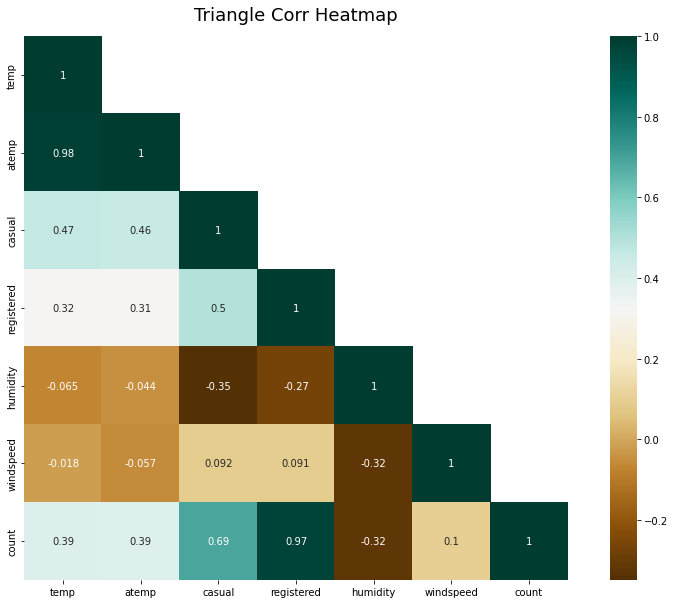

In [ ]:
#觀察連續vs連續變量相關性
#低r<=0.3 中0.3<r<=0.7 高r>0.7
corrMatt = train[['temp', 'atemp', 'casual', 'registered', 'humidity', 'windspeed', 'count']].corr()
mask = np.triu(np.ones_like(corrMatt, dtype=np.bool), 1)

fig, ax = plt.subplots()
fig.set_size_inches(15,10)
corrHeatmap = sns.heatmap(corrMatt, mask=mask, vmax=1, square=True, annot=True, cmap='BrBG')
corrHeatmap.set_title('Triangle Corr Heatmap', fontdict={'fontsize':18}, pad=16)

Text(0.5, 1.0, 'Features Corr with Count')

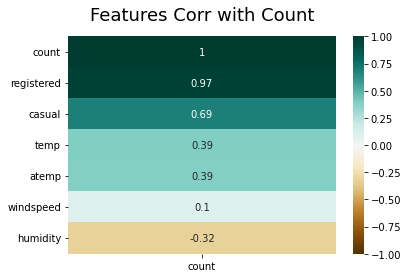

In [ ]:
sortHeatmap = sns.heatmap(corrMatt[['count']].sort_values(by='count', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
sortHeatmap.set_title('Features Corr with Count', fontdict={'fontsize':18}, pad=16)

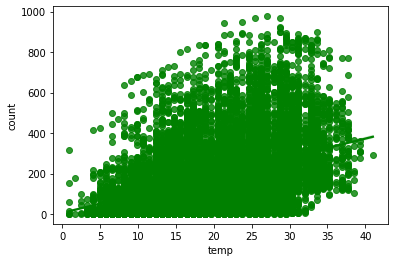

In [ ]:
g = sns.regplot(x='temp', y='count', color='g',data=train)

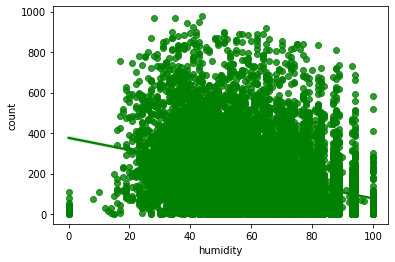

In [ ]:
g = sns.regplot(x='humidity', y='count', color='g',data=train)

In [ ]:
#觀察離散vs連續變量相關性
#eta squared
!pip install pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pingouin as pg

In [ ]:
#離散vs連續:workingday無相關
aov = pg.anova(dv='count', between='workingday', data=train, detailed=True)
aov

,Source,SS,DF,MS,F,p-unc,np2
0,workingday,4.801037e+04,1,48010.372613,1.463199,0.226448,0.000134
1,Within,3.571249e+08,10884,32811.916878,NaN,NaN,NaN


In [ ]:
etaSq = aov.SS[0] / (aov.SS[0] + aov.SS[1])
print(etaSq)
def judgment_etaSq(etaSq):
    if etaSq < .01:
        qual = 'Negligible'
    elif etaSq < .06:
        qual = 'Small'
    elif etaSq < .14:
        qual = 'Medium'
    else:
        qual = 'Large'
    return(qual)
judgment_etaSq(etaSq)

0.00013441773094935832


'Negligible'

In [ ]:
#離散vs連續:hour高相關
aov = pg.anova(dv='count', between='hour', data=train, detailed=True)
aov

,Source,SS,DF,MS,F,p-unc,np2
0,hour,1.845339e+08,23,8.023212e+06,504.799696,0.0,0.516651
1,Within,1.726390e+08,10862,1.589385e+04,NaN,NaN,NaN


In [ ]:
etaSq = aov.SS[0] / (aov.SS[0] + aov.SS[1])
print(etaSq)
judgment_etaSq(etaSq)

0.5166513867097802


'Large'

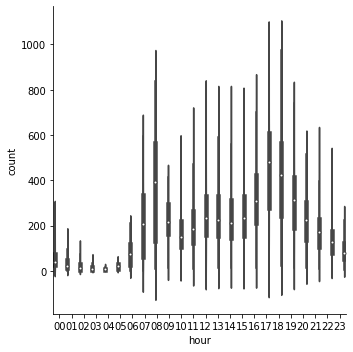

In [ ]:
g = sns.catplot(x='hour', y='count', hue='hour', data=train, kind="violin")

In [ ]:
#離散vs連續:weather低相關
aov = pg.anova(dv='count', between='weather', data=train, detailed=True)
aov

,Source,SS,DF,MS,F,p-unc,np2
0,weather,6.338070e+06,3,2.112690e+06,65.530241,5.482069e-42,0.017745
1,Within,3.508348e+08,10882,3.223992e+04,NaN,NaN,NaN


In [ ]:
etaSq = aov.SS[0] / (aov.SS[0] + aov.SS[1])
print(etaSq)
judgment_etaSq(etaSq)

0.017745102088558083


'Small'

In [ ]:
#g = sns.catplot(x='weather', y='count', hue='weather', data=train, kind="violin")

In [ ]:
#離散vs連續:weekday無相關
aov = pg.anova(dv='count', between='weekday', data=train, detailed=True)
aov

,Source,SS,DF,MS,F,p-unc,np2
0,weekday,3.569194e+05,6,59486.571087,1.813692,0.092198,0.000999
1,Within,3.568160e+08,10879,32798.602284,NaN,NaN,NaN


In [ ]:
etaSq = aov.SS[0] / (aov.SS[0] + aov.SS[1])
print(etaSq)
judgment_etaSq(etaSq)

0.0009992902956930613


'Negligible'

In [ ]:
#視覺化得知工作日使用集中在上下班時間 假日使用集中在中午--->新增特徵rushhour
def rush(df): 
  if (df.workingday == 1):
    if df.hour == '8' or df.hour == '17' or df.hour == '18':
      return('1')
    else:
      return('0')
  else:
    if df.hour == '10' or df.hour == '11' or df.hour == '12' or df.hour == '13' or df.hour == '14' or df.hour == '15' or df.hour == '16' or df.hour == '17' or df.hour == '18':
      return('1')
    else:
      return('0')
    

train['rushhour']=train.apply(rush,axis=1)

In [ ]:
train[train['rushhour']=='1']

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,hour,weekday,rushhour
10,2011-01-01 10:00:00,Spring,0,0,1,15.58,19.695,76,16.9979,12,24,36,2011-01-01,2011,January,10,Saturday,1
11,2011-01-01 11:00:00,Spring,0,0,1,14.76,16.665,81,19.0012,26,30,56,2011-01-01,2011,January,11,Saturday,1
12,2011-01-01 12:00:00,Spring,0,0,1,17.22,21.210,77,19.0012,29,55,84,2011-01-01,2011,January,12,Saturday,1
13,2011-01-01 13:00:00,Spring,0,0,2,18.86,22.725,72,19.9995,47,47,94,2011-01-01,2011,January,13,Saturday,1
14,2011-01-01 14:00:00,Spring,0,0,2,18.86,22.725,72,19.0012,35,71,106,2011-01-01,2011,January,14,Saturday,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10832,2012-12-17 18:00:00,Winter,0,1,2,16.40,20.455,94,6.0032,14,493,507,2012-12-17,2012,December,18,Monday,1
10855,2012-12-18 17:00:00,Winter,0,1,1,16.40,20.455,47,30.0026,39,533,572,2012-12-18,2012,December,17,Tuesday,1
10856,2012-12-18 18:00:00,Winter,0,1,1,15.58,19.695,46,22.0028,13,512,525,2012-12-18,2012,December,18,Tuesday,1
10879,2012-12-19 17:00:00,Winter,0,1,1,16.40,20.455,50,26.0027,26,536,562,2012-12-19,2012,December,17,Wednesday,1


In [ ]:
#離散vs連續:rushhour高相關
aov = pg.anova(dv='count', between='rushhour', data=train, detailed=True)
aov

,Source,SS,DF,MS,F,p-unc,np2
0,rushhour,1.009481e+08,1,1.009481e+08,4288.105868,0.0,0.282631
1,Within,2.562248e+08,10884,2.354142e+04,NaN,NaN,NaN


In [ ]:
etaSq = aov.SS[0] / (aov.SS[0] + aov.SS[1])
print(etaSq)
judgment_etaSq(etaSq)

0.28263089547184866


'Large'

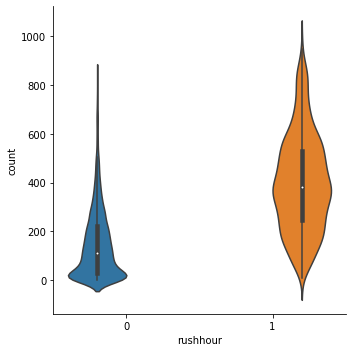

In [ ]:
g = sns.catplot(x='rushhour', y='count', hue='rushhour', data=train, kind="violin")

In [ ]:
#視覺化得知假日使用集中在中午非上下班需求 是否與天氣有關--->新增特徵sunnywknd
def sunny(df): 
  if (df.workingday == 0):
    if df.weather == 1:
      return('1')
    else:
      return('0')
  else:
    return('0')

train['sunnywknd']=train.apply(sunny,axis=1)

In [ ]:
train[train['sunnywknd']=='1']

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,hour,weekday,rushhour,sunnywknd
0,2011-01-01 00:00:00,Spring,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011-01-01,2011,January,00,Saturday,0,1
1,2011-01-01 01:00:00,Spring,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011-01-01,2011,January,01,Saturday,0,1
2,2011-01-01 02:00:00,Spring,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011-01-01,2011,January,02,Saturday,0,1
3,2011-01-01 03:00:00,Spring,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011-01-01,2011,January,03,Saturday,0,1
4,2011-01-01 04:00:00,Spring,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011-01-01,2011,January,04,Saturday,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10784,2012-12-15 18:00:00,Winter,0,0,1,15.58,19.695,58,11.0014,40,232,272,2012-12-15,2012,December,18,Saturday,1,1
10785,2012-12-15 19:00:00,Winter,0,0,1,14.76,17.425,62,8.9981,32,225,257,2012-12-15,2012,December,19,Saturday,0,1
10787,2012-12-15 21:00:00,Winter,0,0,1,14.76,17.425,62,8.9981,15,169,184,2012-12-15,2012,December,21,Saturday,0,1
10788,2012-12-15 22:00:00,Winter,0,0,1,14.76,17.425,62,12.9980,22,134,156,2012-12-15,2012,December,22,Saturday,0,1


In [ ]:
#離散vs連續:sunnywknd無相關
aov = pg.anova(dv='count', between='sunnywknd', data=train, detailed=True)
aov

,Source,SS,DF,MS,F,p-unc,np2
0,sunnywknd,4.159824e+05,1,415982.401538,12.690861,0.000369,0.001165
1,Within,3.567569e+08,10884,32778.108349,NaN,NaN,NaN


In [ ]:
etaSq = aov.SS[0] / (aov.SS[0] + aov.SS[1])
print(etaSq)
judgment_etaSq(etaSq)

0.0011646527091250078


'Negligible'

## Correlation Analysis - Windspeed


In [ ]:
#重新預測風速需要哪些columns
#觀察連續vs連續變量相關性:temp/atemp/humidity
#低r<=0.3 中0.3<r<=0.7 高r>0.7
#風速僅跟humidity中度負相關

In [ ]:
datatrain = pd.read_csv('/content/drive/MyDrive/Projects/bikesharing/train.csv')
datatest = pd.read_csv('/content/drive/MyDrive/Projects/bikesharing/test.csv')
submit = pd.read_csv('/content/drive/MyDrive/Projects/bikesharing/sampleSubmission.csv')

In [ ]:
data = datatrain.append(datatest)
data.reset_index(inplace=True)
data.drop('index', inplace=True, axis=1)
data.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1.0


In [ ]:
#feature engineering
data['date'] = data.datetime.apply(lambda x : x.split(' ')[0]) #split要有空格
data['year'] = data.datetime.apply(lambda x : x.split(' ')[0].split('-')[0]).astype('int') #原本為索引字串轉換成整數
data['month'] = data.date.apply(lambda datestring : datetime.strptime(datestring, '%Y-%m-%d').month)
data['hour'] = data.datetime.apply(lambda x : x.split(' ')[1].split(':')[0]).astype('int')
data['weekday'] = data.date.apply(lambda datestring : datetime.strptime(datestring,'%Y-%m-%d').weekday())
data.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,hour,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0,2011-01-01,2011,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0,2011-01-01,2011,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0,2011-01-01,2011,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13.0,2011-01-01,2011,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1.0,2011-01-01,2011,1,4,5


In [ ]:
datawind0 = data[data['windspeed']==0]
datawindnot0 = data[data['windspeed'] !=0]

Text(0.5, 1.0, 'Triangle Corr Heatmap - WIND')

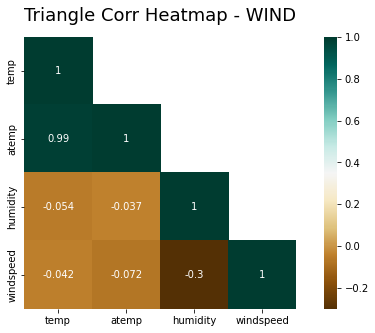

In [ ]:
corrMatt_wind = datawindnot0[['temp', 'atemp', 'humidity', 'windspeed']].corr()
mask = np.triu(np.ones_like(corrMatt_wind, dtype=np.bool), 1)

fig, ax = plt.subplots()
fig.set_size_inches(10,5)
corrHeatmap = sns.heatmap(corrMatt_wind, mask=mask, vmax=1, square=True, annot=True, cmap='BrBG')
corrHeatmap.set_title('Triangle Corr Heatmap - WIND', fontdict={'fontsize':18}, pad=16)

Text(0.5, 1.0, 'Features Corr with Windspeed')

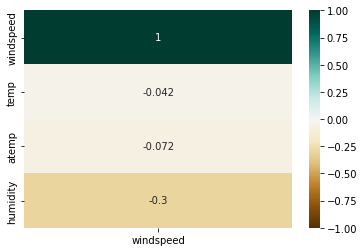

In [ ]:
sortHeatmap_wind = sns.heatmap(corrMatt_wind[['windspeed']].sort_values(by='windspeed', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
sortHeatmap.set_title('Features Corr with Windspeed', fontdict={'fontsize':18}, pad=16)

In [ ]:
#重新預測風速需要哪些columns
#觀察連續vs離散變量相關性:season/weather/year/month/hour
##風速僅跟season/month/hour中低度相關
#eta squared
#def judgment_etaSq(etaSq):
#    if etaSq < .01:
#        qual = 'Negligible'
#    elif etaSq < .06:
#        qual = 'Small'
#    elif etaSq < .14:
#        qual = 'Medium'
#    else:
#        qual = 'Large'
#    return(qual)

In [ ]:
aov = pg.anova(dv='windspeed', between='season', data=datawindnot0, detailed=True)
aov

,Source,SS,DF,MS,F,p-unc,np2
0,season,16948.357607,3,5649.452536,115.029328,1.176633e-73,0.022206
1,Within,746274.299343,15195,49.113149,NaN,NaN,NaN


In [ ]:
etaSq = aov.SS[0] / (aov.SS[0] + aov.SS[1])
print(etaSq)
judgment_etaSq(etaSq)

0.022206308280181247


'Small'

In [ ]:
aov = pg.anova(dv='windspeed', between='weather', data=datawindnot0, detailed=True)
aov

,Source,SS,DF,MS,F,p-unc,np2
0,weather,5156.764871,3,1718.921624,34.454807,3.487511e-22,0.006757
1,Within,758065.892079,15195,49.889167,NaN,NaN,NaN


In [ ]:
etaSq = aov.SS[0] / (aov.SS[0] + aov.SS[1])
print(etaSq)
judgment_etaSq(etaSq)

0.006756566808137396


'Negligible'

In [ ]:
aov = pg.anova(dv='windspeed', between='year', data=datawindnot0, detailed=True)
aov

,Source,SS,DF,MS,F,p-unc,np2
0,year,238.19485,1,238.194850,4.744326,0.02941,0.000312
1,Within,762984.46210,15197,50.206255,NaN,NaN,NaN


In [ ]:
etaSq = aov.SS[0] / (aov.SS[0] + aov.SS[1])
print(etaSq)
judgment_etaSq(etaSq)

0.0003120909049990906


'Negligible'

In [ ]:
aov = pg.anova(dv='windspeed', between='month', data=datawindnot0, detailed=True)
aov

,Source,SS,DF,MS,F,p-unc,np2
0,month,26642.655292,11,2422.059572,49.938661,1.038351e-108,0.034908
1,Within,736580.001658,15187,48.500691,NaN,NaN,NaN


In [ ]:
etaSq = aov.SS[0] / (aov.SS[0] + aov.SS[1])
print(etaSq)
judgment_etaSq(etaSq)

0.03490810322487586


'Small'

In [ ]:
aov = pg.anova(dv='windspeed', between='hour', data=datawindnot0, detailed=True)
aov

,Source,SS,DF,MS,F,p-unc,np2
0,hour,47081.674561,23,2047.029329,43.376473,1.446195e-189,0.061688
1,Within,716140.982389,15175,47.192157,NaN,NaN,NaN


In [ ]:
etaSq = aov.SS[0] / (aov.SS[0] + aov.SS[1])
print(etaSq)
judgment_etaSq(etaSq)

0.06168799384115091


'Medium'

#**PREDICTION**

In [ ]:
#1.載入資料
#2.無空值 train data 的count有離群值 為提升泛化能力移除離群值
#3.合併訓練及測試資料
#4.特徵工程 新增特徵欄位
#5.風速為零的資料重新估計
#6.類別&連續資料型別轉換
#7.分割訓練測試資料
#8.丟棄不用欄位
#9.預測結果右偏取log讓分布接近常態分佈
#10.隨機森林預測結果
#11.計算訓練資料的rmsle

## Combine train and test

In [ ]:
datatrain = pd.read_csv('/content/drive/MyDrive/Projects/bikesharing/train.csv')
datatest = pd.read_csv('/content/drive/MyDrive/Projects/bikesharing/test.csv')
submit = pd.read_csv('/content/drive/MyDrive/Projects/bikesharing/sampleSubmission.csv')

In [ ]:
data = datatrain.append(datatest)
data.reset_index(inplace=True)
data.drop('index', inplace=True, axis=1)

In [ ]:

data.head(3) #datetime需處理

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0


In [ ]:
data.shape

(17379, 12)

In [ ]:
#feature engineering
data['date'] = data.datetime.apply(lambda x : x.split(' ')[0]) #split要有空格
data['year'] = data.datetime.apply(lambda x : x.split(' ')[0].split('-')[0]).astype('int') #原本為索引字串轉換成整數
data['month'] = data.date.apply(lambda datestring : datetime.strptime(datestring, '%Y-%m-%d').month)
data['hour'] = data.datetime.apply(lambda x : x.split(' ')[1].split(':')[0]).astype('int')
data['weekday'] = data.date.apply(lambda datestring : datetime.strptime(datestring,'%Y-%m-%d').weekday())

In [ ]:
#train['date'] = train.datetime.apply(lambda x : x.split(' ')[0]) #split要有空格
#train['year'] = train.datetime.apply(lambda x : x.split(' ')[0].split('-')[0])
#train['month'] = train.date.apply(lambda datestring : calendar.month_name[datetime.strptime(datestring, '%Y-%m-%d').month])
#train['hour'] = train.datetime.apply(lambda x : x.split(' ')[1].split(':')[0])
#train['weekday'] = train.date.apply(lambda datestring : calendar.day_name[datetime.strptime(datestring,'%Y-%m-%d').weekday()])
#train['season'] = train.season.map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})
#train['weather'] = train.weather.map({1:'Clear + Few clouds + Partly cloudy + Partly cloudy',\
#                                     2:'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',\
#                                     3:'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',\
#                                     4:'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'})

In [ ]:
def rush(df): 
  if (df.workingday == 1):
    if df.hour == 8 or df.hour == 17 or df.hour == 18:
      return('1')
    else:
      return('0')
  else:
    if 10 <= df.hour <= 18:
      return('1')
    else:
      return('0')

In [ ]:

#視覺化得知工作日使用集中在上下班時間 假日使用集中在中午--->新增特徵rushhour

data['rushhour']=data.apply(rush,axis=1)

In [ ]:
data[data['rushhour'] == '1']

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,hour,weekday,rushhour
10,2011-01-01 10:00:00,1,0,0,1,15.58,19.695,76,16.9979,12.0,24.0,36.0,2011-01-01,2011,1,10,5,1
11,2011-01-01 11:00:00,1,0,0,1,14.76,16.665,81,19.0012,26.0,30.0,56.0,2011-01-01,2011,1,11,5,1
12,2011-01-01 12:00:00,1,0,0,1,17.22,21.210,77,19.0012,29.0,55.0,84.0,2011-01-01,2011,1,12,5,1
13,2011-01-01 13:00:00,1,0,0,2,18.86,22.725,72,19.9995,47.0,47.0,94.0,2011-01-01,2011,1,13,5,1
14,2011-01-01 14:00:00,1,0,0,2,18.86,22.725,72,19.0012,35.0,71.0,106.0,2011-01-01,2011,1,14,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17348,2012-12-30 17:00:00,1,0,0,1,10.66,11.365,41,22.0028,NaN,NaN,NaN,2012-12-30,2012,12,17,6,1
17349,2012-12-30 18:00:00,1,0,0,2,9.84,10.605,44,19.9995,NaN,NaN,NaN,2012-12-30,2012,12,18,6,1
17363,2012-12-31 08:00:00,1,0,1,1,5.74,7.575,69,8.9981,NaN,NaN,NaN,2012-12-31,2012,12,8,0,1
17372,2012-12-31 17:00:00,1,0,1,2,10.66,14.395,48,6.0032,NaN,NaN,NaN,2012-12-31,2012,12,17,0,1


In [ ]:
data.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,hour,weekday,rushhour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0,2011-01-01,2011,1,0,5,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0,2011-01-01,2011,1,1,5,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0,2011-01-01,2011,1,2,5,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13.0,2011-01-01,2011,1,3,5,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1.0,2011-01-01,2011,1,4,5,0


In [ ]:
data.shape

(17379, 18)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    17379 non-null  object 
 1   season      17379 non-null  int64  
 2   holiday     17379 non-null  int64  
 3   workingday  17379 non-null  int64  
 4   weather     17379 non-null  int64  
 5   temp        17379 non-null  float64
 6   atemp       17379 non-null  float64
 7   humidity    17379 non-null  int64  
 8   windspeed   17379 non-null  float64
 9   casual      10886 non-null  float64
 10  registered  10886 non-null  float64
 11  count       10886 non-null  float64
 12  date        17379 non-null  object 
 13  year        17379 non-null  int64  
 14  month       17379 non-null  int64  
 15  hour        17379 non-null  int64  
 16  weekday     17379 non-null  int64  
 17  rushhour    17379 non-null  object 
dtypes: float64(6), int64(9), object(3)
memory usage: 2.4+ MB


## Random forest model to predict windspeed

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

[Text(0.5, 0, 'windspeed'), Text(0.5, 1.0, 'distribution of windspeed')]

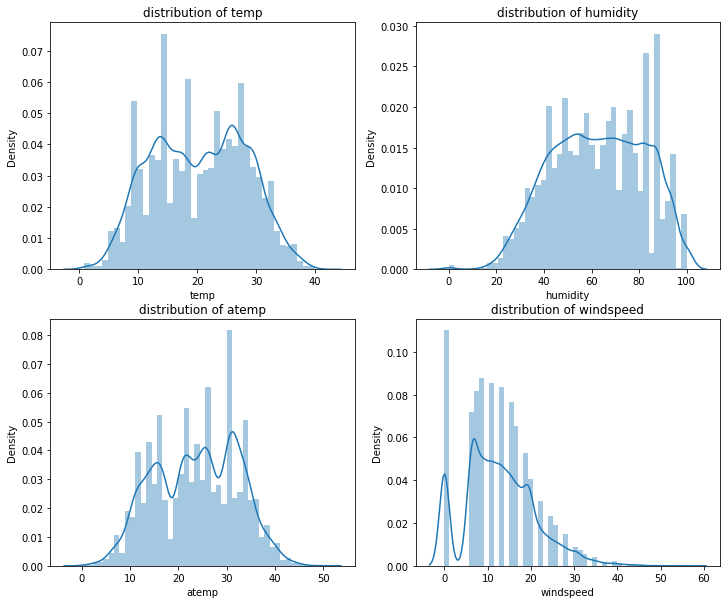

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(12,10)
sns.distplot(data['temp'], ax=axes[0][0])
sns.distplot(data['atemp'], ax=axes[1][0])
sns.distplot(data['humidity'], ax=axes[0][1])
sns.distplot(data['windspeed'], ax=axes[1][1])

axes[0][0].set(xlabel='temp', title='distribution of temp')
axes[1][0].set(xlabel='atemp', title='distribution of atemp')
axes[0][1].set(xlabel='humidity', title='distribution of humidity')
axes[1][1].set(xlabel='windspeed', title='distribution of windspeed')
#風速空值都補植為0 Model會失準 須重新估計風速為0的值

In [ ]:
#將資料分成風速0 風速不為0
datawind0 = data[data['windspeed']==0]
datawindnot0 = data[data['windspeed'] !=0]
rfmodel_wind = RandomForestRegressor(n_estimators=1000, random_state=42)
#用來預測風速Y的欄位X有哪些:atemp humidity season temp weather year month
windcols = ['humidity', 'season', 'month', 'temp', 'atemp', 'year', 'weather']
#用風速不為0的欄位X來TRAIN MODEL
rfmodel_wind.fit(datawindnot0[windcols], datawindnot0['windspeed'])
#用風速為0的欄位X 預測
wind0values = rfmodel_wind.predict(X= datawind0[windcols])
datawind0.loc[:, 'windspeed']=wind0values #values是值 要用loc指定位置才可放入
#合併風速0 風速不為0
data = datawind0.append(datawindnot0)
data.reset_index(inplace=True, drop=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


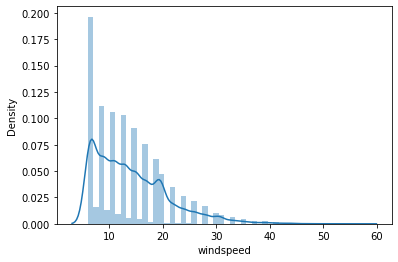

In [ ]:
sns.distplot(data['windspeed']) #空隙都被填滿了

## Coercing to categorical type

In [ ]:
categoricalFeatureNames = ['season', 'holiday', 'weather', 'month', 'year', 'hour', 'workingday', 'weekday']
numericalFeatureNames = ['temp', 'atemp', 'humidity', 'windspeed']
dropFeatures = ['date', 'datetime', 'casual', 'registered', 'count']

In [ ]:
for var in categoricalFeatureNames:
    data[var] = data[var].astype('category')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   datetime    17379 non-null  object  
 1   season      17379 non-null  category
 2   holiday     17379 non-null  category
 3   workingday  17379 non-null  category
 4   weather     17379 non-null  category
 5   temp        17379 non-null  float64 
 6   atemp       17379 non-null  float64 
 7   humidity    17379 non-null  int64   
 8   windspeed   17379 non-null  float64 
 9   casual      10886 non-null  float64 
 10  registered  10886 non-null  float64 
 11  count       10886 non-null  float64 
 12  date        17379 non-null  object  
 13  year        17379 non-null  category
 14  month       17379 non-null  category
 15  hour        17379 non-null  category
 16  weekday     17379 non-null  category
 17  rushhour    17379 non-null  object  
dtypes: category(8), float64(6), int64(1), object(3

In [ ]:
data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,hour,weekday,rushhour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,6.901524,3.0,13.0,16.0,2011-01-01,2011,1,0,5,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,6.760467,8.0,32.0,40.0,2011-01-01,2011,1,1,5,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,6.760467,5.0,27.0,32.0,2011-01-01,2011,1,2,5,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,6.695714,3.0,10.0,13.0,2011-01-01,2011,1,3,5,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,6.695714,0.0,1.0,1.0,2011-01-01,2011,1,4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.001400,NaN,NaN,NaN,2012-12-31,2012,12,19,0,0
17375,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.001400,NaN,NaN,NaN,2012-12-31,2012,12,20,0,0
17376,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.001400,NaN,NaN,NaN,2012-12-31,2012,12,21,0,0
17377,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.998100,NaN,NaN,NaN,2012-12-31,2012,12,22,0,0


## Splitting train and test

In [ ]:
dataTrain = data[pd.notnull(data['count'])].sort_values(by=['datetime'])
dataTest = data[-pd.notnull(data['count'])].sort_values(by=['datetime'])
#drop cols:datetime date casual registered count #保留submit要用的datetimecol trainmodel要用的count
datetimecols = dataTest['datetime']
ylabels = dataTrain['count']
ylabelsRegistered = dataTrain['registered']
ylabelsCasual = dataTrain['casual']

In [ ]:
dataTrain = dataTrain.drop(dropFeatures, axis=1)
dataTest = dataTest.drop(dropFeatures, axis=1)

## RMSLE Scorer

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


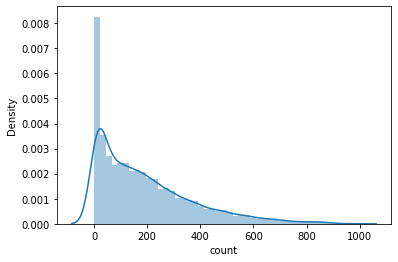

In [ ]:
sns.distplot(ylabels)#不符常態分配

In [ ]:
ylabelsLog = np.log1p(ylabels) #將train的Y值取lOG

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


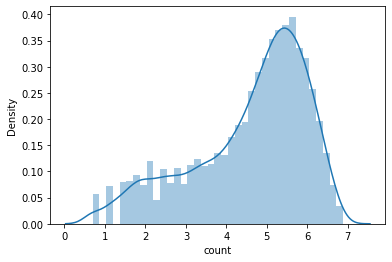

In [ ]:

sns.distplot(ylabelsLog) 

In [ ]:
def rmsle(y, y_, convertExp=True):
    if convertExp:
        y = np.exp(y)
        y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v+1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v+1) for v in y_]))
    calc = (log1-log2)**2
    return np.sqrt(np.mean(calc))

## Random forest

In [ ]:
rfModel = RandomForestRegressor(n_estimators=1000, random_state=42, oob_score=True)
rfModel.fit(dataTrain, ylabelsLog)
pred = rfModel.predict(X=dataTest)
np.exp(pred)
print('%.4f'%rfModel.oob_score_)

0.9577


In [ ]:
#RMSLE Value for train data 
trainpred = rfModel.predict(X=dataTrain)
print('RMSLE value:', rmsle(np.exp(ylabelsLog), np.exp(trainpred), False))

RMSLE value: 0.1001050545879469


In [ ]:
submission = pd.DataFrame({
    'datetime' : datetimecols,
    'count' : np.exp(pred)
})
submission
submission.to_csv('bikesharing_pred_rf.csv', index=False)